In [1]:

import csv, math
from matplotlib import pyplot as plt 
import numpy as np 
from decimal import *


In [2]:
# csv file name 
fileNameFormat = "mqttpython-rate-{}.csv"
recordedRates = [0.2, 0.5, 1, 2, 5, 10]

# csv file headers
cpuUsage_header = "CPU usage"
ramUsage_header = " RAM usage"
timeStamp_header = "Timestamp"

csvHeaders = [cpuUsage_header, ramUsage_header, timeStamp_header]

In [3]:
# raspi data

data_raspi = {rate: {header:[] for header in csvHeaders} for rate in recordedRates}
for rate in recordedRates:
    with open("raspberry-pi/" + fileNameFormat.format(rate), "r") as csvFile:
        csvReader = csv.DictReader(csvFile)
        timestamp = 0
        timedelta = 0.1
        for row in csvReader:
            for header in csvHeaders:
                if header == timeStamp_header:
                    data_raspi[rate][header].append(timestamp)
                    timestamp += timedelta
                else:
                    data_raspi[rate][header].append(float(row[header]))

In [4]:
# udoo bolt

data_udoobolt = {rate: {header:[] for header in csvHeaders} for rate in recordedRates}
for rate in recordedRates:
    with open("udoo-bolt/" + fileNameFormat.format(rate), "r") as csvFile:
        csvReader = csv.DictReader(csvFile)
        timestamp = 0
        timedelta = 0.1
        for row in csvReader:
            for header in csvHeaders:
                if header == timeStamp_header:
                    data_udoobolt[rate][header].append(timestamp)
                    timestamp += timedelta
                else:
                    data_udoobolt[rate][header].append(float(row[header]))

In [5]:
# process data
avgData_udoobolt = {cpuUsage_header:[], ramUsage_header:[]}
avgData_raspi = {cpuUsage_header:[], ramUsage_header:[]}
maxData_udoobolt = {cpuUsage_header:[], ramUsage_header:[]}
maxData_raspi = {cpuUsage_header:[], ramUsage_header:[]}
for rate in recordedRates:
    avgData_udoobolt[cpuUsage_header].append(np.average(data_udoobolt[rate][cpuUsage_header])/2)
    avgData_raspi[cpuUsage_header].append(np.average(data_raspi[rate][cpuUsage_header])/4)

    avgData_udoobolt[ramUsage_header].append(np.average(data_udoobolt[rate][ramUsage_header]))
    avgData_raspi[ramUsage_header].append(np.average(data_raspi[rate][ramUsage_header]))

    maxData_udoobolt[cpuUsage_header].append(np.max(data_udoobolt[rate][cpuUsage_header])/2)
    maxData_raspi[cpuUsage_header].append(np.max(data_raspi[rate][cpuUsage_header])/4)

    maxData_udoobolt[ramUsage_header].append(np.max(data_udoobolt[rate][ramUsage_header]))
    maxData_raspi[ramUsage_header].append(np.max(data_raspi[rate][ramUsage_header]))

print("Raspberry pi:", avgData_raspi, maxData_raspi)
print("Udoo Bolt:", avgData_udoobolt, maxData_udoobolt)

Raspberry pi: {'CPU usage': [0.025, 0.05, 0.075, 0.11100000000000002, 0.29774999999999996, 0.63275], ' RAM usage': [0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996, 0.19999999999999996]} {'CPU usage': [2.5, 2.5, 2.5, 2.5, 2.5, 5.0], ' RAM usage': [0.2, 0.2, 0.2, 0.2, 0.2, 0.2]}
Udoo Bolt: {'CPU usage': [0.0, 0.05, 0.05, 0.1, 0.245, 0.49], ' RAM usage': [0.0, 0.0, 0.0, 0.0, 0.01, 0.02]} {'CPU usage': [0.0, 5.0, 5.0, 5.0, 5.0, 5.0], ' RAM usage': [0.0, 0.0, 0.0, 0.0, 1.0, 1.0]}


<ipython-input-6-ec9671c47752>:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


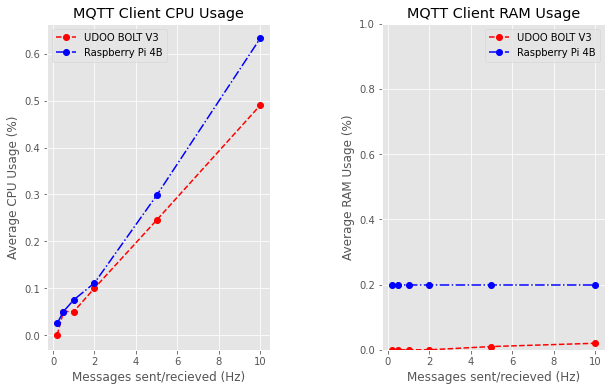

In [6]:
# plotter

plt.style.use("ggplot")

fig = plt.figure(figsize=[10,6])
#fig.tight_layout(pad=10.0)
fig.subplots_adjust(wspace=0.5)

axis = fig.add_subplot(1, 2, 1)

axis.set_title("MQTT Client CPU Usage")

axis.plot(recordedRates, avgData_udoobolt[cpuUsage_header], 'ro--', label='UDOO BOLT V3')
axis.plot(recordedRates, avgData_raspi[cpuUsage_header], 'bo-.', label='Raspberry Pi 4B')

#axis.set_xscale("log")
#axis.set_yscale("log")
axis.set_ylabel('Average CPU Usage (%)')
axis.set_xlabel('Messages sent/recieved (Hz)')
axis.legend()

axis = fig.add_subplot(1, 2, 2)

axis.set_title("MQTT Client RAM Usage")

axis.plot(recordedRates, avgData_udoobolt[ramUsage_header], 'ro--', label='UDOO BOLT V3')
axis.plot(recordedRates, avgData_raspi[ramUsage_header], 'bo-.', label='Raspberry Pi 4B')
#axis.set_xscale("log")
axis.set_ylabel('Average RAM Usage (%)')
axis.set_ylim(0, 1)
axis.set_xlabel('Messages sent/recieved (Hz)')
axis.legend()

fig.show()

fig.savefig('mqtt.pdf')

2
3
4
5
6
7


<ipython-input-7-7ca31a0168ff>:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


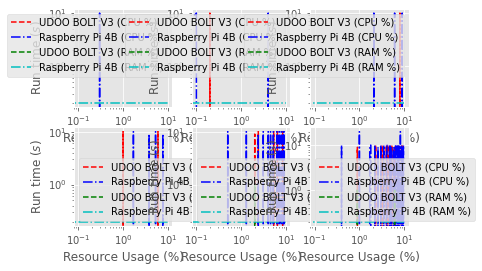

In [7]:
# plotter

plt.style.use("ggplot")

fig = plt.figure()
fig.tight_layout(pad=10.0)

#plt.grid()
plot_idx = 1

sqrtSize = math.sqrt(len(recordedRates))
#fillEmptySpace = (math.floor(sqrtSize) * math.ceil(sqrtSize)) != len(recordedRates) 

for rate in recordedRates:
    #axis = fig.add_subplot(math.floor(sqrtSize), math.ceil(sqrtSize) if (plot_idx <= math.ceil(sqrtSize) and (not fillEmptySpace)) else math.floor(sqrtSize), plot_idx + (0 if plot_idx <= math.ceil(sqrtSize) and math.floor(sqrtSize) != math.ceil(sqrtSize) else -1))
    axis = fig.add_subplot(math.floor(sqrtSize), math.ceil(sqrtSize), plot_idx)
    plot_idx += 1
    print(plot_idx)
    #col.title("Rate = {}Hz".format(rate))

    axis.plot(data_udoobolt[rate][timeStamp_header], data_udoobolt[rate][cpuUsage_header], 'r--', label='UDOO BOLT V3 (CPU %)')
    axis.plot(data_raspi[rate][timeStamp_header], data_raspi[rate][cpuUsage_header], 'b-.', label='Raspberry Pi 4B (CPU %)')

    axis.plot(data_udoobolt[rate][timeStamp_header], data_udoobolt[rate][ramUsage_header], 'g--', label='UDOO BOLT V3 (RAM %)')
    axis.plot(data_raspi[rate][timeStamp_header], data_raspi[rate][ramUsage_header], 'c-.', label='Raspberry Pi 4B (RAM %)')

    axis.set_xscale("log")
    axis.set_yscale("log")
    axis.set_xlabel('Resource Usage (%)')
    axis.set_ylabel('Run time ($s$)')
    axis.legend()

fig.show()

In [8]:
print(np.divide(avgData_udoobolt[cpuUsage_header], avgData_raspi[cpuUsage_header]))
print(np.divide(avgData_udoobolt[ramUsage_header], avgData_raspi[ramUsage_header]))
#print("Difference between results: Udoo_performance is better than Raspi_performance by a factor of {}, avg={:.3f}".format(
#    "(" + ", ".join("{:.4f}".format(1/s) for s in np.divide(avgData_udoobolt[cpuUsage_header], avgData_raspi[cpuUsage_header]) if s != 0)+ ")"
#    , float(np.average(1/np.divide((avgData_udoobolt[ramUsage_header], (avgData_raspi[ramUsage_header])))))))

[0.         1.         0.66666667 0.9009009  0.82283795 0.77439747]
[0.   0.   0.   0.   0.05 0.1 ]


In [9]:
# export to latex
# ...